"Attached to this email are two images, good.png, and bad.png. The good.png file is an image of a metallic part without any defects and bad.png is a sample bad part. Note : attached bad part image is an example of nut missing defect. There can be different kinds of defects(like rust,dent etc.) present anywhere on the part.
The assignment is to come up with a deep-learning based solution that can differentiate b/w good and bad parts and clearly visualise the location of the defect. The solution should take into account that new types of defects are often discovered in the field and should be designed to incorporate new defects with as few changes as possible."

 PS: Mandatory points to remember
Use of the Deep Learning method is mandatory.
 Do the assignment in google colab and submit the link. This is to circumvent the version mismatch problem.

Explanation for the dataset provided:
Let me explain by giving an example of a smartphone. For the first case, imagine a smartphone which is not defective, i.e. good. Now there can be only one image of it. For the second case, i.e. defected case, there  can be an infinite number of ways in which defects can be introduced in smartphones. So we can never have a dataset of all the defects.

The problem statement of the assignment is similar. One good image has been given for the good part and for the bad part an example has been given as bad_image.png.

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def read_image(file_path):
    img = cv2.imread(file_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
goodimage = read_image('./data/good_image.png') #
badimage = read_image('./data/bad_image.png')[60:410,150:600] #

In [4]:
# approach

# expectation: hardware object placed in same orientation everytime before the camera

In [5]:
# step - 1
# generating feature representation of good image using a pretrained model.
# it will contain high level semantic information.

# use efficientnet model to extract final layer conv layer after global-average-pool
# result -> 1356 for eff-B3 
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Input

base_model = EfficientNetB3(include_top=False,weights='imagenet',input_tensor=Input(shape=(300, 300, 3)))
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# model_embed = Model(inputs=base_model.input, outputs=x)




In [6]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')
    np_image = transform.resize(np_image, (300, 300, 3))
    np_image = preprocess_input(np_image)
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

In [7]:
image = load('./data/good_image.png')
badimage = load('./data/bad_image.png')

In [8]:
pred = base_model.predict(image)

In [9]:
pred = pred.reshape(100,1536)


In [10]:
pred_bad  = base_model.predict(badimage)


In [11]:
pred_bad = pred_bad.reshape(100,1536)

In [12]:
from scipy.spatial.distance import cdist

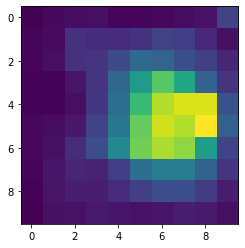

In [79]:
plt.imshow(np.diagonal(cdist(pred, pred_bad, 'cosine')).reshape(10,10))
plt.show()
plt.imsave('./data/heat.png', tst_img)

In [68]:
tst_img = np.diagonal(cdist(pred, pred_bad, 'cosine')).reshape(10,10)


In [72]:
img = cv2.addWeighted(goodimage, 0.3, tst_img, 0.7, 0) 

error: OpenCV(4.2.0) /io/opencv/modules/core/src/arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


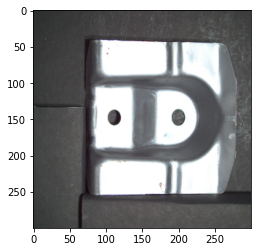

In [51]:
plt.imshow(badimage[0].astype(int))

In [45]:
pred.shape

(100, 1536)

In [33]:
import numpy as np

In [53]:
# step 2
# assuming we have more number of bad images in real case
# generate augmented imges fo r bad images
# cut out aug to create more defected objects
# https://arxiv.org/abs/1708.04552
def cutout(image, size=30, n_squares=1):
    h, w, channels = image.shape
    tmp_image = image.copy()
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        tmp_image[y1:y2,x1:x2,:] = 0.0
    return tmp_image
# generate same feature for all images



In [60]:
ls = []
for _ in range(10):
    ls.append(cutout(goodimage))

In [106]:
plt.imsave('./data/ls1.jpg', ls[1])

In [64]:
pred_good = base_model.predict(image)


In [62]:
def load_ls(o):
#     np_image = Image.open(filename)
    np_image = np.array(o).astype('float32')
    np_image = transform.resize(np_image, (300, 300, 3))
    np_image = preprocess_input(np_image)
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

In [63]:
pred_ls1 = base_model.predict(load_ls(ls[1]))

In [66]:
pred_good = pred_good.reshape(100,1536)
pred_ls1= pred_ls1.reshape(100,1536)

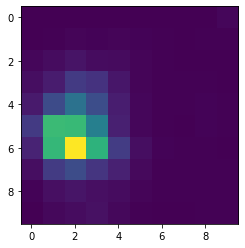

In [113]:
plt.imshow(np.diagonal(cdist(pred_good, pred_ls1, 'cosine')).reshape(10,10))
plt.imsave('./data/heat.jpg', np.diagonal(cdist(pred_good, pred_ls1, 'cosine')).reshape(10,10))

In [125]:
try:
    from PIL import Image
except ImportError:
    import Image

background = Image.open("./data/ls1.jpg")
overlay = Image.open("./data/heat.jpg")
overlay

In [128]:
background = background.resize((300,300))
overlay = overlay.resize((300,300))
# overlay

In [131]:
background = background.convert("RGBA")
overlay = overlay.convert("RGBA")

new_img = Image.blend(background, overlay, 0.5)
new_img.save("new_test.png","PNG")

In [23]:
# compare cosine distance


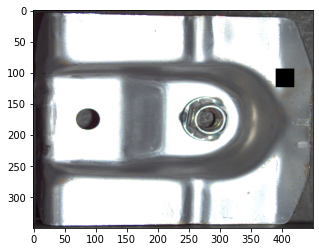

In [24]:
plt.imshow(ls[1])

In [ ]:
plt.imshow(ls)